<a href="https://colab.research.google.com/github/jtmeawno1/bsc_dpdm22/blob/main/%5Bdataprep%5D_property_estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#เปรียบเทียบความแตกต่างในการประเมินราคาทรัพย์แต่ละทรัพย์ของนักประเมินแต่ละคนและของราคาตั้งขาย


In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import os
os.chdir('/content/drive/MyDrive/bsc_DPDM_data/')

!pwd 

/content/drive/MyDrive/bsc_DPDM_data


In [ ]:
!ls

thsarabunnew-webfont.ttf     thsarabunnew-webfont.ttf.5
thsarabunnew-webfont.ttf.1   thsarabunnew-webfont.ttf.6
thsarabunnew-webfont.ttf.10  thsarabunnew-webfont.ttf.7
thsarabunnew-webfont.ttf.2   thsarabunnew-webfont.ttf.8
thsarabunnew-webfont.ttf.3   thsarabunnew-webfont.ttf.9
thsarabunnew-webfont.ttf.4   คำตอบนักประเมิน.xlsx


In [ ]:
import pandas as pd

In [ ]:
home = pd.read_excel('คำตอบนักประเมิน.xlsx',sheet_name='บ้าน')
home.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,100.0
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,NaN,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,NaN
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,5900000.0,5000000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN


## นักประเมินคนที่ 1

In [ ]:
est1 = home[home['ID ผู้ประเมิน']==1]
est1

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,100.0
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,NaN
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,5900000.0,5000000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
6,1,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000.0,3500000.0,"5,000-18,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,NaN
8,1,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000.0,2500000.0,"5,000-25,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,1,https://nayoo.co/khonkaen/posts/19495,บ้านเดี่ยว,มั่นใจ,5500000.0,4500000.0,"3,000-30,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,NaN
156,1,https://nayoo.co/khonkaen/posts/19496,บ้านเดี่ยว,มั่นใจ,7911000.0,5200000.0,"3,000-30,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,NaN
157,1,https://nayoo.co/khonkaen/posts/20,บ้านเดี่ยว,มั่นใจ,2000000.0,3600000.0,"3,000-30,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,NaN
158,1,https://nayoo.co/khonkaen/posts/31,บ้านเดี่ยว,มั่นใจ,4000000.0,4000000.0,"3,000-35,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN


In [ ]:
est1.describe()['ประเมินราคาซื้อ-ขาย']

count    1.000000e+02
mean     3.938500e+06
std      2.368553e+06
min      6.000000e+05
25%      2.775000e+06
50%      3.600000e+06
75%      4.500000e+06
max      1.600000e+07
Name: ประเมินราคาซื้อ-ขาย, dtype: float64

In [ ]:
est1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    100
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [ ]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')
     

In [ ]:
from matplotlib import pyplot as plt

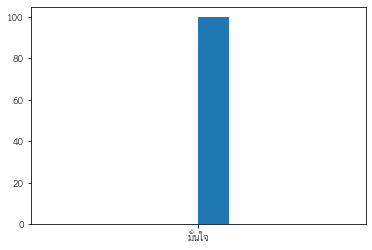

In [ ]:
ret1_conf = plt.hist(est1['ความมั่นใจในการเมินราคาทรัพย์'])

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

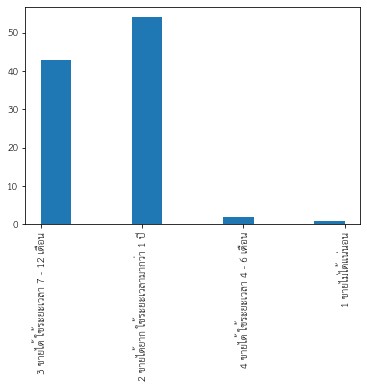

In [ ]:
ret1_score = plt.hist(est1['ให้คะแนนทรัพย์'])
plt.xticks(rotation='vertical')

In [ ]:
ret1_score

(array([43.,  0.,  0., 54.,  0.,  0.,  2.,  0.,  0.,  1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

In [ ]:
est1['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    54
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     43
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน       2
1 ขายไม่ได้แน่นอน                      1
Name: ให้คะแนนทรัพย์, dtype: int64

In [ ]:
est1.groupby('ให้คะแนนทรัพย์')['ให้คะแนนทรัพย์'].count()

ให้คะแนนทรัพย์
1 ขายไม่ได้แน่นอน                      1
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    54
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     43
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน       2
Name: ให้คะแนนทรัพย์, dtype: int64

## นักประเมินคนที่ 2

In [ ]:
est2 = home[home['ID ผู้ประเมิน']==2]
print(f'ประเมินทั้งหมด {len(est2)}')

ประเมินทั้งหมด 90


In [ ]:
est2.describe()['ประเมินราคาซื้อ-ขาย']

count    8.900000e+01
mean     4.153258e+06
std      2.386901e+06
min      9.900000e+05
25%      2.600000e+06
50%      3.900000e+06
75%      4.900000e+06
max      1.700000e+07
Name: ประเมินราคาซื้อ-ขาย, dtype: float64

In [ ]:
est2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ       89
ไม่มั่นใจ     1
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [ ]:
est2['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     64
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน      23
5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน      1
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี     1
Name: ให้คะแนนทรัพย์, dtype: int64

#HW 1

เปรียบเทียบความแตกต่างในการประเมินราคาทรัพย์แต่ละทรัพย์ของนักประเมินแต่ละคนและของราคาตั้งขายใช้ MAPE ในการเปรียบเทียบ

### Home

In [ ]:
est2['ประเมิน1'] = est2['post id'].map(est1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);

In [ ]:
est2['ประเมิน2'] = est2['post id'].map(est2.set_index('post id')['ประเมินราคาซื้อ-ขาย']);

#### Table 

In [ ]:
assess = est2[['post id','ราคาทรัพย์','ประเมิน1','ประเมิน2']]
assess = assess.fillna(value={'ประเมิน2':est2['ประเมิน2'].mean()})
assess

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/25,2700000.0,2500000.0,2700000.0
3,https://nayoo.co/khonkaen/posts/33,2600000.0,2200000.0,2400000.0
5,https://nayoo.co/khonkaen/posts/495,5900000.0,5000000.0,9000000.0
7,https://nayoo.co/khonkaen/posts/564,4400000.0,3500000.0,3700000.0
9,https://nayoo.co/khonkaen/posts/566,2750000.0,2500000.0,2500000.0
...,...,...,...,...
185,https://nayoo.co/khonkaen/posts/19495,5500000.0,4500000.0,5000000.0
186,https://nayoo.co/khonkaen/posts/19496,7911000.0,5200000.0,7400000.0
187,https://nayoo.co/khonkaen/posts/20,2000000.0,3600000.0,2500000.0
188,https://nayoo.co/khonkaen/posts/31,4000000.0,4000000.0,3900000.0


In [ ]:
assess.isnull().sum()

post id       0
ราคาทรัพย์    0
ประเมิน1      0
ประเมิน2      0
dtype: int64

#### MAPE 

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as mape
#Note: Keep in mind that the function does not represent the output as a percentage in the range [0, 100].
#Instead, we represent it in the range [0, 1/eps]. The best value is 0.0.

In [130]:
actual = assess['ราคาทรัพย์']
pre1 = assess['ประเมิน1']
pre2 = assess['ประเมิน2']

In [131]:
pred1 = mape(actual, pre1)
pred2 = mape(actual, pre2)
mapeh = mape(pre1,pre2)

In [132]:
print(f'ผู้ประเมินคนที่ 1 ได้ค่า MAPE เท่ากับ {pred1:.2f}\nผู้ประเมินคนที่ 2 ได้ค่า MAPE เท่ากับ {pred2:.2f}\nแสดงว่าผู้ประเมินคนที่ 2 สามารถประเมินราคาซื้อ-ขายบ้านได้แม่นยำกว่า\nราคาตั้งขายของผู้ประเมินคนที่ 1 กับ ผู้ประเมินคนที่ 2 ได้ค่า MAPE เท่ากับ {mapeh:.2f}')

ผู้ประเมินคนที่ 1 ได้ค่า MAPE เท่ากับ 0.12
ผู้ประเมินคนที่ 2 ได้ค่า MAPE เท่ากับ 0.10
แสดงว่าผู้ประเมินคนที่ 2 สามารถประเมินราคาซื้อ-ขายบ้านได้แม่นยำกว่า
ราคาตั้งขายของผู้ประเมินคนที่ 1 กับ ผู้ประเมินคนที่ 2 ได้ค่า MAPE เท่ากับ 0.14


### Land

In [ ]:
land = pd.read_excel('คำตอบนักประเมิน.xlsx',sheet_name='ที่ดิน')
land.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,1800000.0,"8,000-25,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,100.0
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2000000.0,"ราคาเสนอขาย 7,000-12,0000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN
2,4,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,3000000.0,12000-18000,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,NaN


In [ ]:
land['ID ผู้ประเมิน'].value_counts()

1    100
2    100
4     10
Name: ID ผู้ประเมิน, dtype: int64

In [ ]:
est1_l = land[land['ID ผู้ประเมิน']==1]

In [ ]:
est2_l = land[land['ID ผู้ประเมิน']==2]

In [ ]:
est2_l['ประเมิน1'] = est2_l['post id'].map(est1_l.set_index('post id')['ประเมินราคาซื้อ-ขาย']);

In [ ]:
est2_l['ประเมิน2'] = est2_l['post id'].map(est2_l.set_index('post id')['ประเมินราคาซื้อ-ขาย']);

#### Table

In [ ]:
assess_l = est2_l[['post id','ราคาทรัพย์','ประเมิน1','ประเมิน2']]
assess_l

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/1033,2800000,1800000.0,2000000.0
4,https://nayoo.co/khonkaen/posts/1711,14900000,8000000.0,12000000.0
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0
10,https://nayoo.co/khonkaen/posts/1732,65000000,35000000.0,60000000.0
13,https://nayoo.co/khonkaen/posts/1866,3000000,2200000.0,2500000.0
...,...,...,...,...
200,https://nayoo.co/khonkaen/posts/14539,5000000,4000000.0,4000000.0
202,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0
204,https://nayoo.co/khonkaen/posts/17093,2650000,2000000.0,2500000.0
206,https://nayoo.co/khonkaen/posts/17112,1300000,1500000.0,1500000.0


In [ ]:
assess_l.isnull().sum() 

post id       0
ราคาทรัพย์    0
ประเมิน1      0
ประเมิน2      0
dtype: int64

#### MAPE 

In [134]:
actual_l = assess_l['ราคาทรัพย์']
pre_l = assess_l['ประเมิน1']
pre_l2 = assess_l['ประเมิน2']

In [135]:
pred1_l = mape(actual_l, pre_l)
pred2_l = mape(actual_l, pre_l2)
mapel = mape(pre_l,pre_l2)

In [121]:
print(f'ผู้ประเมินคนที่ 1 ได้ค่า MAPE เท่ากับ {pred1_l:.2f} \nผู้ประเมินคนที่ 2 ได้ค่า MAPE เท่ากับ {pred2_l:.2f}\nแสดงว่าผู้ประเมินคนที่ 2 สามารถประเมินราคาซื้อ-ขายที่ดินได้แม่นยำกว่า\nราคาตั้งขายของผู้ประเมินคนที่ 1 กับ ผู้ประเมินคนที่ 2 ได้ค่า MAPE เท่ากับ {mapel:.2f}')

ผู้ประเมินคนที่ 1 ได้ค่า MAPE เท่ากับ 0.41 
ผู้ประเมินคนที่ 2 ได้ค่า MAPE เท่ากับ 0.40
แสดงว่าผู้ประเมินคนที่ 2 สามารถประเมินราคาซื้อ-ขายที่ดินได้แม่นยำกว่า
ราคาตั้งขายของผู้ประเมินคนที่ 1 กับ ผู้ประเมินคนที่ 2 ได้ค่า MAPE เท่ากับ 0.74


### Condo

In [ ]:
condo = pd.read_excel('คำตอบนักประเมิน.xlsx',sheet_name='คอนโด')
condo.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10
0,1,32.0,คอนโด,มั่นใจ,3500000.0,3500000.0,"60,000-130,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1,1,36.0,คอนโด,มั่นใจ,1930000.0,2200000.0,"50,000-90,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
2,1,603.0,คอนโด,มั่นใจ,2438000.0,2800000.0,"35,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


In [ ]:
condo['ID ผู้ประเมิน'].value_counts()

1    10
Name: ID ผู้ประเมิน, dtype: int64

In [ ]:
condo.rename(columns={'ประเมินราคาซื้อ-ขาย':'ประเมิน1'}, inplace=True)

#### Table

In [ ]:
assess_c = condo[['post id','ราคาทรัพย์','ประเมิน1']]
assess_c

,post id,ราคาทรัพย์,ประเมิน1
0,32.0,3500000.0,3500000.0
1,36.0,1930000.0,2200000.0
2,603.0,2438000.0,2800000.0
3,1395.0,1600000.0,2300000.0
4,1443.0,1860000.0,1800000.0
5,1609.0,1490000.0,1500000.0
6,1640.0,1280000.0,1600000.0
7,1641.0,4290000.0,2700000.0
8,1650.0,1700000.0,1550000.0
9,1840.0,3790000.0,2800000.0


#### MAPE

In [ ]:
actual_c = assess_c['ราคาทรัพย์']
pre_c = assess_c['ประเมิน1']
pred1_c = mape(actual_c, pre_c)

In [ ]:
print(f'ผู้ประเมินคนที่ 1 ได้ค่า MAPE เท่ากับ {pred1_c:.2f}')

ผู้ประเมินคนที่ 1 ได้ค่า MAPE เท่ากับ 0.17


###Townhome

In [ ]:
town = pd.read_excel('คำตอบนักประเมิน.xlsx',sheet_name='ทาวน์โฮม')
town.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,700000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,120.0
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,1500000.0,ราคาซื้อขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000.0,700000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN


In [ ]:
town['ID ผู้ประเมิน'].value_counts()

1    120
2    120
Name: ID ผู้ประเมิน, dtype: int64

In [ ]:
est1_t = town[town['ID ผู้ประเมิน']==1]

In [ ]:
est2_t = town[town['ID ผู้ประเมิน']==2]

In [ ]:
est2_t['ประเมิน1'] = est2_t['post id'].map(est1_t.set_index('post id')['ประเมินราคาซื้อ-ขาย']);

<ipython-input-50-34da30f31d1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2_t['ประเมิน1'] = est2_t['post id'].map(est1_t.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


In [ ]:
est2_t['ประเมิน2'] = est2_t['post id'].map(est2_t.set_index('post id')['ประเมินราคาซื้อ-ขาย']);

<ipython-input-51-e952ecd63c9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2_t['ประเมิน2'] = est2_t['post id'].map(est2_t.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


#### Table

In [ ]:
assess_t = est2_t[['post id','ราคาทรัพย์','ประเมิน1','ประเมิน2']]
assess_t

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/548,1045000.0,700000.0,1500000.0
3,https://nayoo.co/khonkaen/posts/549,935000.0,700000.0,1500000.0
5,https://nayoo.co/khonkaen/posts/579,3520000.0,3500000.0,4000000.0
7,https://nayoo.co/khonkaen/posts/580,3850000.0,3500000.0,3200000.0
9,https://nayoo.co/khonkaen/posts/582,990000.0,1000000.0,800000.0
...,...,...,...,...
235,https://nayoo.co/khonkaen/posts/18547,1430000.0,1000000.0,1200000.0
236,https://nayoo.co/khonkaen/posts/18551,1980000.0,1500000.0,1700000.0
237,https://nayoo.co/khonkaen/posts/19434,2000000.0,1600000.0,1900000.0
238,https://nayoo.co/khonkaen/posts/19501,1790000.0,1600000.0,1700000.0


In [ ]:
assess_t.isnull().sum() 

post id       0
ราคาทรัพย์    0
ประเมิน1      0
ประเมิน2      0
dtype: int64

#### MAPE 

In [136]:
actual_t = assess_t['ราคาทรัพย์']
pre_t = assess_t['ประเมิน1']
pre_t2 = assess_t['ประเมิน2']

In [137]:
pred1_t = mape(actual_t, pre_t)
pred2_t = mape(actual_t, pre_t2)
mapet = mape(pre_t,pre_t2)

In [124]:
print(f'ผู้ประเมินคนที่ 1 ได้ค่า MAPE เท่ากับ {pred1_t:.2f}\nผู้ประเมินคนที่ 2 ได้ค่า MAPE เท่ากับ {pred2_t:.2f}\nแสดงว่าผู้ประเมินคนที่ 2 สามารถประเมินราคาซื้อ-ขายทาวน์โฮมได้แม่นยำกว่า\nราคาตั้งขายของผู้ประเมินคนที่ 1 กับ ผู้ประเมินคนที่ 2 ได้ค่า MAPE เท่ากับ {mapet:.2f}')

ผู้ประเมินคนที่ 1 ได้ค่า MAPE เท่ากับ 0.11
ผู้ประเมินคนที่ 2 ได้ค่า MAPE เท่ากับ 0.09
แสดงว่าผู้ประเมินคนที่ 2 สามารถประเมินราคาซื้อ-ขายทาวน์โฮมได้แม่นยำกว่า
ราคาตั้งขายของผู้ประเมินคนที่ 1 กับ ผู้ประเมินคนที่ 2 ได้ค่า MAPE เท่ากับ 0.11


### Shop house 

In [ ]:
shoph = pd.read_excel('คำตอบนักประเมิน.xlsx',sheet_name='อาคารพาณิชย์')
shoph.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,6000000.0,"8,000-30,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,NaN,10.0
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,8000000.0,"ราคาเสนอขาย 4,000,000-6,000,000 บาท/คูหา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000.0,12000000.0,"8,000-40,000",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN


In [ ]:
shoph['ID ผู้ประเมิน'].value_counts()

1    10
2    10
Name: ID ผู้ประเมิน, dtype: int64

In [ ]:
est1_s = shoph[shoph['ID ผู้ประเมิน']==1]

In [ ]:
est2_s = shoph[shoph['ID ผู้ประเมิน']==2]

In [ ]:
est2_s['ประเมิน1'] = est2_s['post id'].map(est1_s.set_index('post id')['ประเมินราคาซื้อ-ขาย']);

<ipython-input-100-dbcb5b2fbe34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2_s['ประเมิน1'] = est2_s['post id'].map(est1_s.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


In [ ]:
est2_s['ประเมิน2'] = est2_s['post id'].map(est2_s.set_index('post id')['ประเมินราคาซื้อ-ขาย']);

<ipython-input-101-343d57685f7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2_s['ประเมิน2'] = est2_s['post id'].map(est2_s.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


#### Table

In [ ]:
assess_s = est2_s[['post id','ราคาทรัพย์','ประเมิน1','ประเมิน2']]
assess_s

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/6,7000000.0,6000000.0,8000000.0
3,https://nayoo.co/khonkaen/posts/17,12000000.0,12000000.0,12000000.0
5,https://nayoo.co/khonkaen/posts/21,22500000.0,13500000.0,20000000.0
7,https://nayoo.co/khonkaen/posts/22,3500000.0,4000000.0,4000000.0
9,https://nayoo.co/khonkaen/posts/24,3900000.0,2200000.0,3000000.0
11,https://nayoo.co/khonkaen/posts/30,4800000.0,3600000.0,4000000.0
13,https://nayoo.co/khonkaen/posts/35,2400000.0,2500000.0,2100000.0
15,https://nayoo.co/khonkaen/posts/497,5000000.0,3800000.0,5000000.0
17,https://nayoo.co/khonkaen/posts/498,7000000.0,7000000.0,8000000.0
19,https://nayoo.co/khonkaen/posts/499,9000000.0,8000000.0,10000000.0


In [ ]:
assess_s.isnull().sum() 

post id       0
ราคาทรัพย์    0
ประเมิน1      0
ประเมิน2      0
dtype: int64

#### MAPE 

In [138]:
actual_s = assess_s['ราคาทรัพย์']
pre_s = assess_s['ประเมิน1']
pre_s2 = assess_s['ประเมิน2']

In [139]:
pred1_s = mape(actual_s, pre_s)
pred2_s = mape(actual_s, pre_s2)
mapes = mape(pre_s,pre_s2)

In [140]:
print(f'ผู้ประเมินคนที่ 1 ได้ค่า MAPE เท่ากับ {pred1_s:.2f}\nผู้ประเมินคนที่ 2 ได้ค่า MAPE เท่ากับ {pred2_s:.2f}\nแสดงว่าผู้ประเมินคนที่ 2 สามารถประเมินราคาซื้อ-ขายอาคารพาณิชย์ได้แม่นยำกว่า\nราคาตั้งขายของผู้ประเมินคนที่ 1 กับ ผู้ประเมินคนที่ 2 ได้ค่า MAPE เท่ากับ {mapes:.2f}')

ผู้ประเมินคนที่ 1 ได้ค่า MAPE เท่ากับ 0.18
ผู้ประเมินคนที่ 2 ได้ค่า MAPE เท่ากับ 0.12
แสดงว่าผู้ประเมินคนที่ 2 สามารถประเมินราคาซื้อ-ขายอาคารพาณิชย์ได้แม่นยำกว่า
ราคาตั้งขายของผู้ประเมินคนที่ 1 กับ ผู้ประเมินคนที่ 2 ได้ค่า MAPE เท่ากับ 0.22
